In [5]:
#  Load the featured dataset and basic check ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/home/danial/Data Science/Fraud Detection/Data/featured/featured.csv')

# Quick info to confirm structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283017 entries, 0 to 283016
Data columns (total 37 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             283017 non-null  float64
 1   V1               283017 non-null  float64
 2   V2               283017 non-null  float64
 3   V3               283017 non-null  float64
 4   V4               283017 non-null  float64
 5   V5               283017 non-null  float64
 6   V6               283017 non-null  float64
 7   V7               283017 non-null  float64
 8   V8               283017 non-null  float64
 9   V9               283017 non-null  float64
 10  V10              283017 non-null  float64
 11  V11              283017 non-null  float64
 12  V12              283017 non-null  float64
 13  V13              283017 non-null  float64
 14  V14              283017 non-null  float64
 15  V15              283017 non-null  float64
 16  V16              283017 non-null  floa

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V27,V28,Amount,Class,Hour,Day,Is_Weekend,Log_Amount,Amount_per_Hour,Day_Amount_Diff
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.133558,-0.021053,149.62,0,0.0,0.0,False,5.014760,149.62,58.969206
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.008983,0.014724,2.69,0,0.0,0.0,False,1.305626,2.69,-87.960794
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.055353,-0.059752,378.66,0,0.0,0.0,False,5.939276,378.66,288.009206
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.062723,0.061458,123.50,0,0.0,0.0,False,4.824306,123.50,32.849206
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.219422,0.215153,69.99,0,0.0,0.0,False,4.262539,69.99,-20.660794


In [3]:
#Scale numerical features ---
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_data, columns=df.columns)


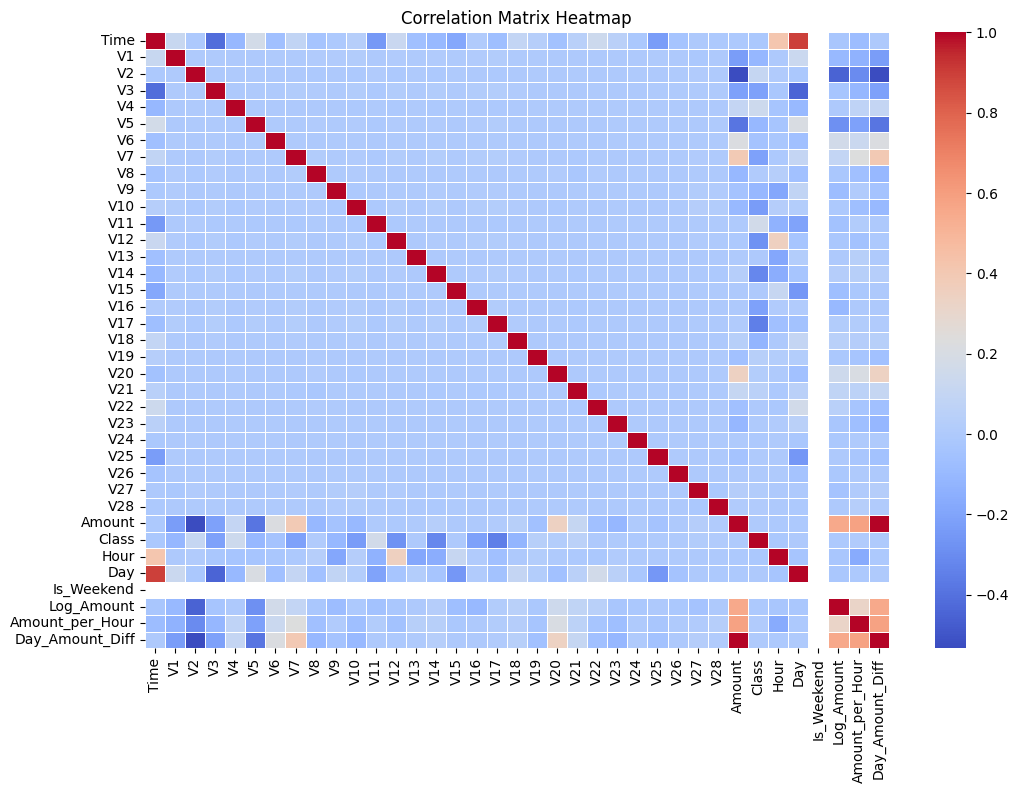

Highly correlated feature pairs (>0.95):
('Day_Amount_Diff', 'Amount', np.float64(0.9999631877774537))


In [7]:
# --- Cell 5: Correlation analysis without dropping ---
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix
corr_matrix = df_scaled.corr()

# Plot heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify highly correlated features (>0.95)
upper = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_pairs = [(col, row, upper[col][row]) 
                   for col in upper.columns 
                   for row in upper.index 
                   if not np.isnan(upper[col][row]) and upper[col][row] > 0.95]

print("Highly correlated feature pairs (>0.95):")
for pair in high_corr_pairs:
    print(pair)


In [8]:
# Drop the highly correlated feature
df_final = df_scaled.drop(columns=['Day_Amount_Diff'])


In [9]:
# --- Cell 6: Save preprocessed dataset ---
df_final.to_csv('/home/danial/Data Science/Fraud Detection/Data/processed/preprocessed.csv', index=False)
